## Importations

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
import configparser
import datetime
import matplotlib.pyplot as plt
import io
import json
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix, save_npz, load_npz, vstack, hstack, bmat
from multiprocessing import Pool

from timeit import default_timer as timer

## Configuration

In [2]:
config = configparser.ConfigParser()
config.read('../config/default.ini')

['../config/default.ini']

In [3]:
engine = sql.create_engine('postgresql://{}:{}@{}:{}/{}'.format(config['DATABASE']['username'], config['DATABASE']['password'].replace('_percentage_', '%'), config['DATABASE']['host'], config['DATABASE']['port'], config['DATABASE']['database']),pool_recycle=600)

## Utilitaires

In [4]:
def export_df(df, name, date=True):
    df.to_csv('../output/{}{}.csv'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name), index=False, encoding='utf-8-sig')

In [5]:
def export_fig(plot, name, date=True):
    plot.savefig('../images/{}{}.png'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name))

## Données

In [6]:
def load_matrix(name, path=''):
    """
    function to load a matrix with the index
    """

    matrix=load_npz(path+name+'.npz')
    with open(path+name+'_index.json', "r") as infile:
        data=json.load(infile)
    rows=data['rows']
    rows=[v for k,v in rows.items()]

    cols=data['columns']
    cols=[v for k,v in cols.items()]

    return matrix, rows, cols

In [7]:
matrix_media_topics, rows_media_topics, cols_media_topics = load_matrix('media_topics','/home/meili/Downloads/matrices/')

In [8]:
matrix_media_topics.shape

(84, 361)

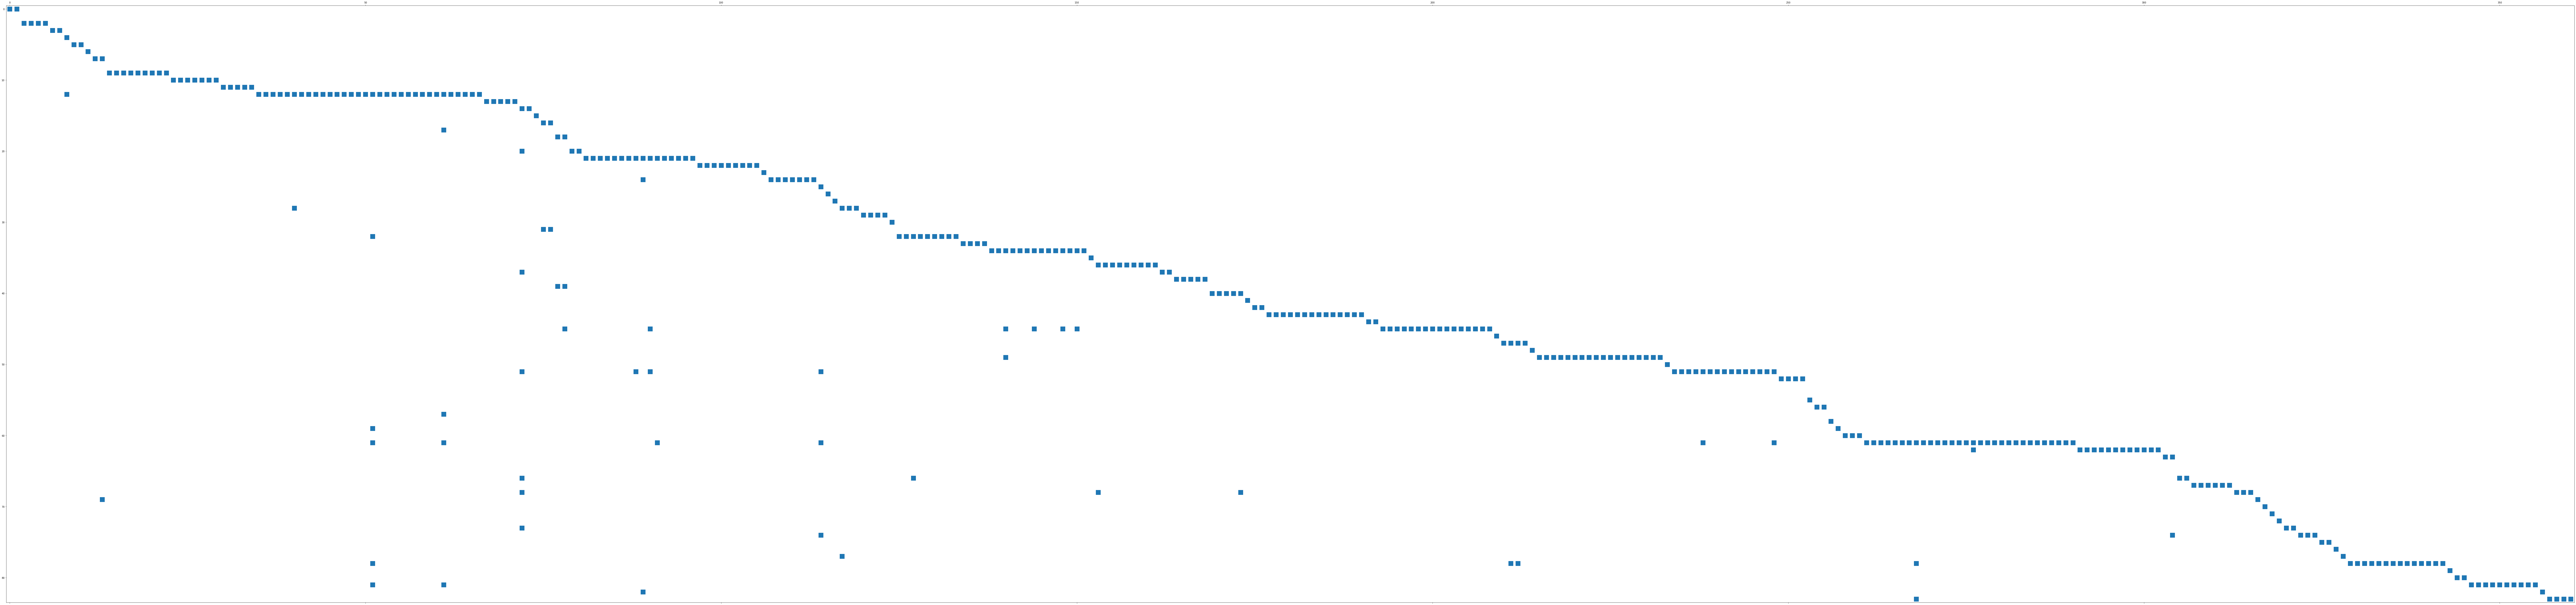

In [9]:
plot = plt.figure(figsize=(200, 200))
plt.spy(matrix_media_topics, markersize=20)
export_fig(plot, 'media_topics')
plt.show()

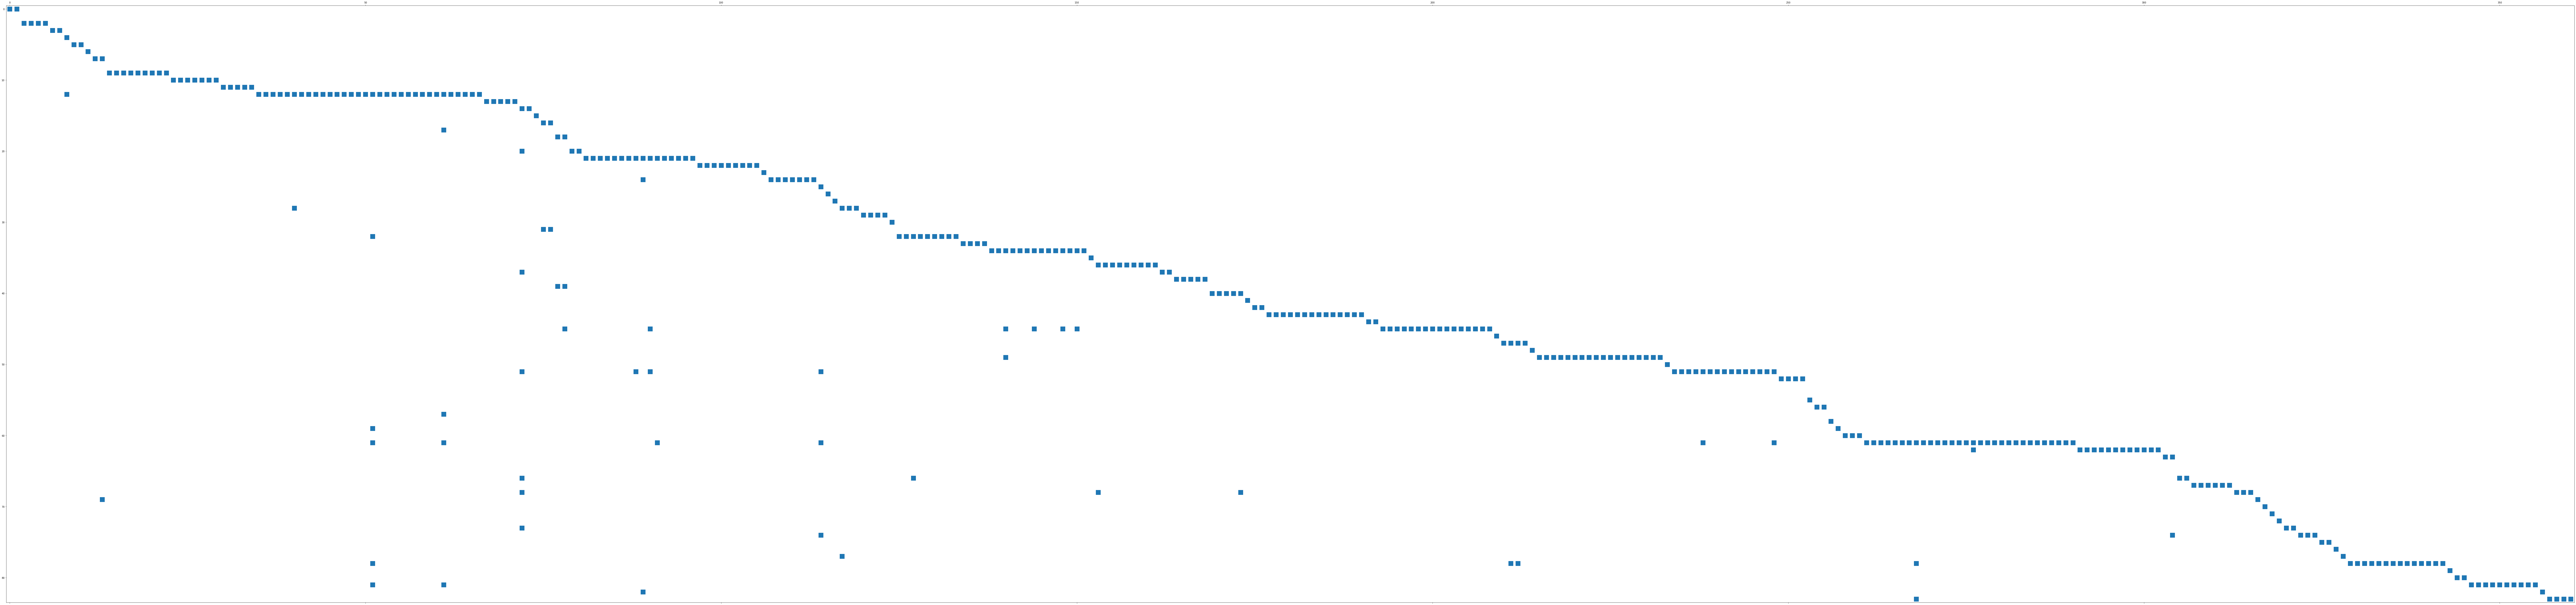

In [10]:
matrix_media_entities, rows_media_entities, cols_media_entities = load_matrix('media_entities','/home/meili/Downloads/matrices/')
plot = plt.figure(figsize=(200, 200))
plt.spy(matrix_media_entities, markersize=20)
export_fig(plot, 'media_entities')
plt.show()

In [11]:
matrix_media_entities.shape

(84, 361)

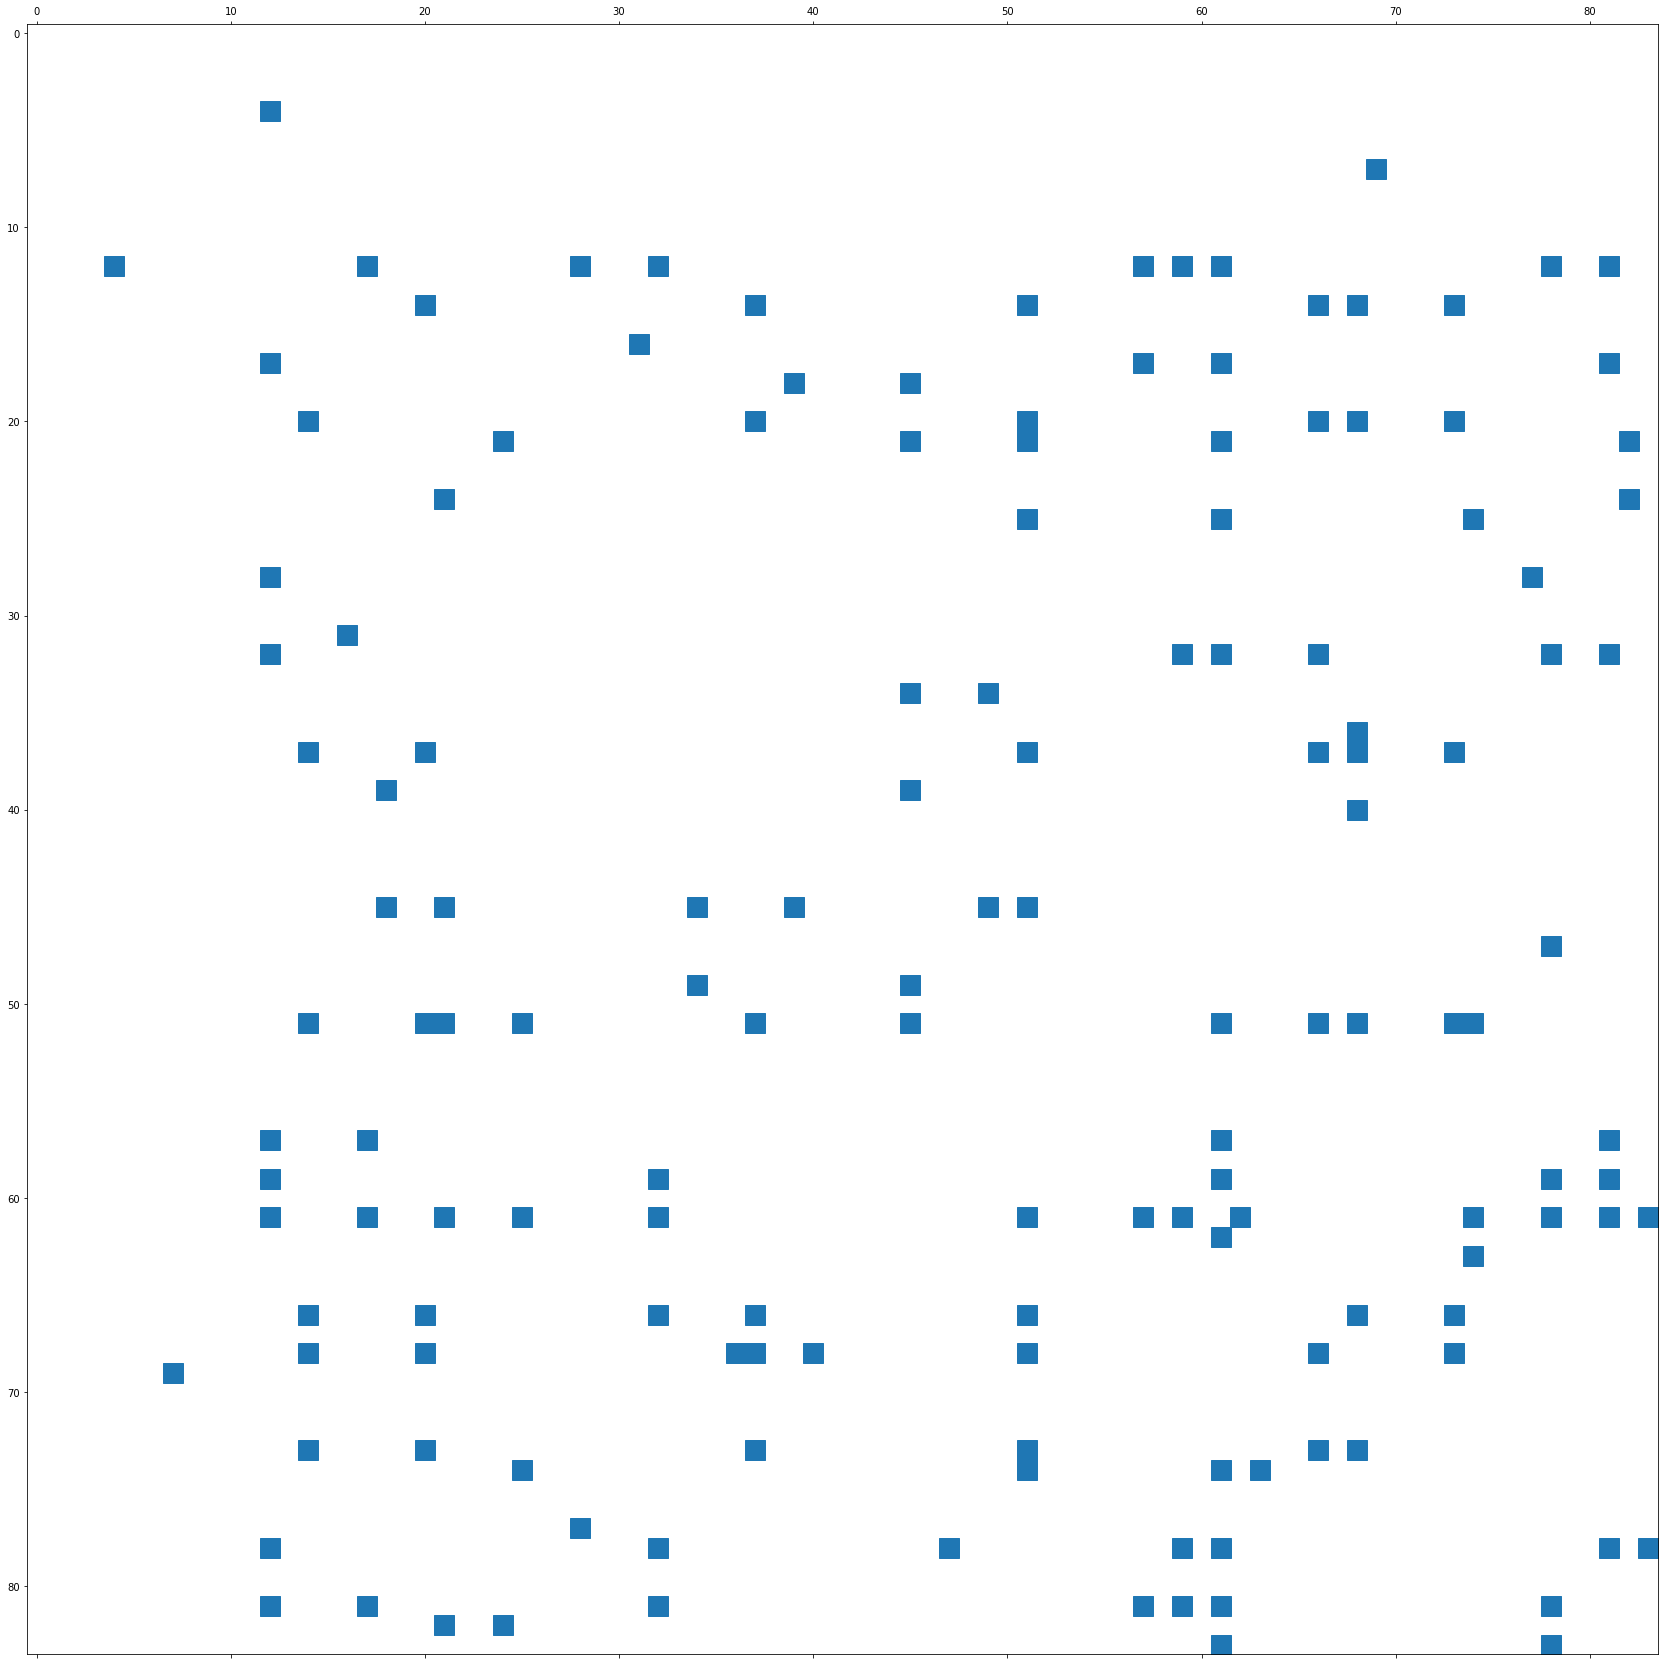

In [12]:
matrix_sim_topics, rows_sim_topics, cols_sim_topics = load_matrix('sim_topics','/home/meili/Downloads/matrices/')
plot = plt.figure(figsize=(30,30))
plt.spy(matrix_sim_topics, markersize=20)
export_fig(plot, 'sim_topics')
plt.show()

In [13]:
matrix_sim_topics.shape

(84, 84)

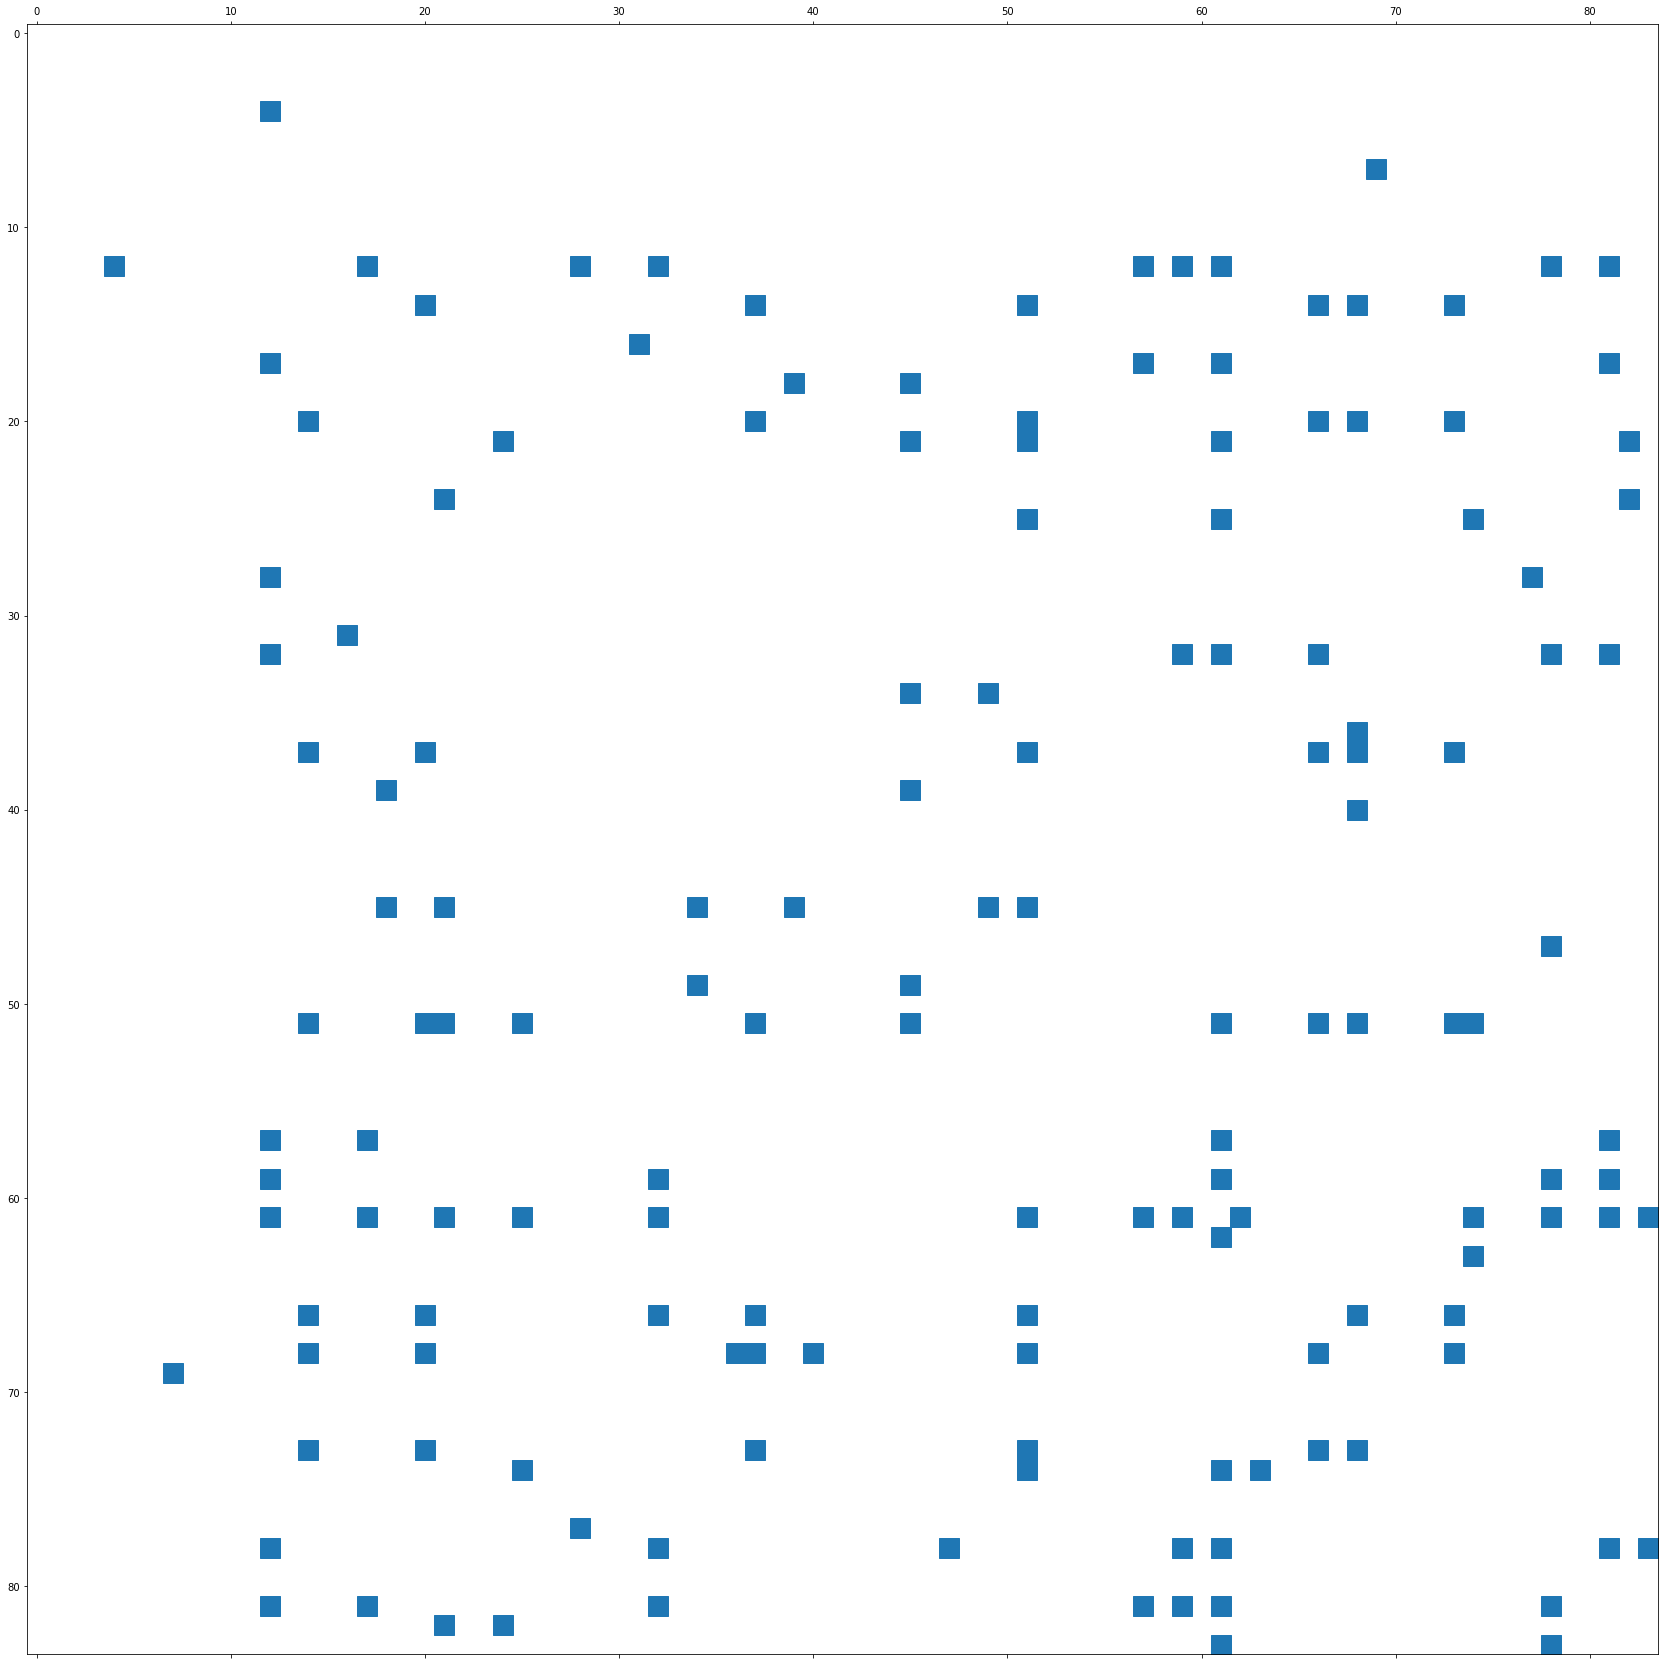

In [14]:
matrix_sim_total, rows, cols = load_matrix('sim_total','/home/meili/Downloads/matrices/')
plt.figure(figsize=(30, 30))
plt.spy(matrix_sim_total, markersize=20)

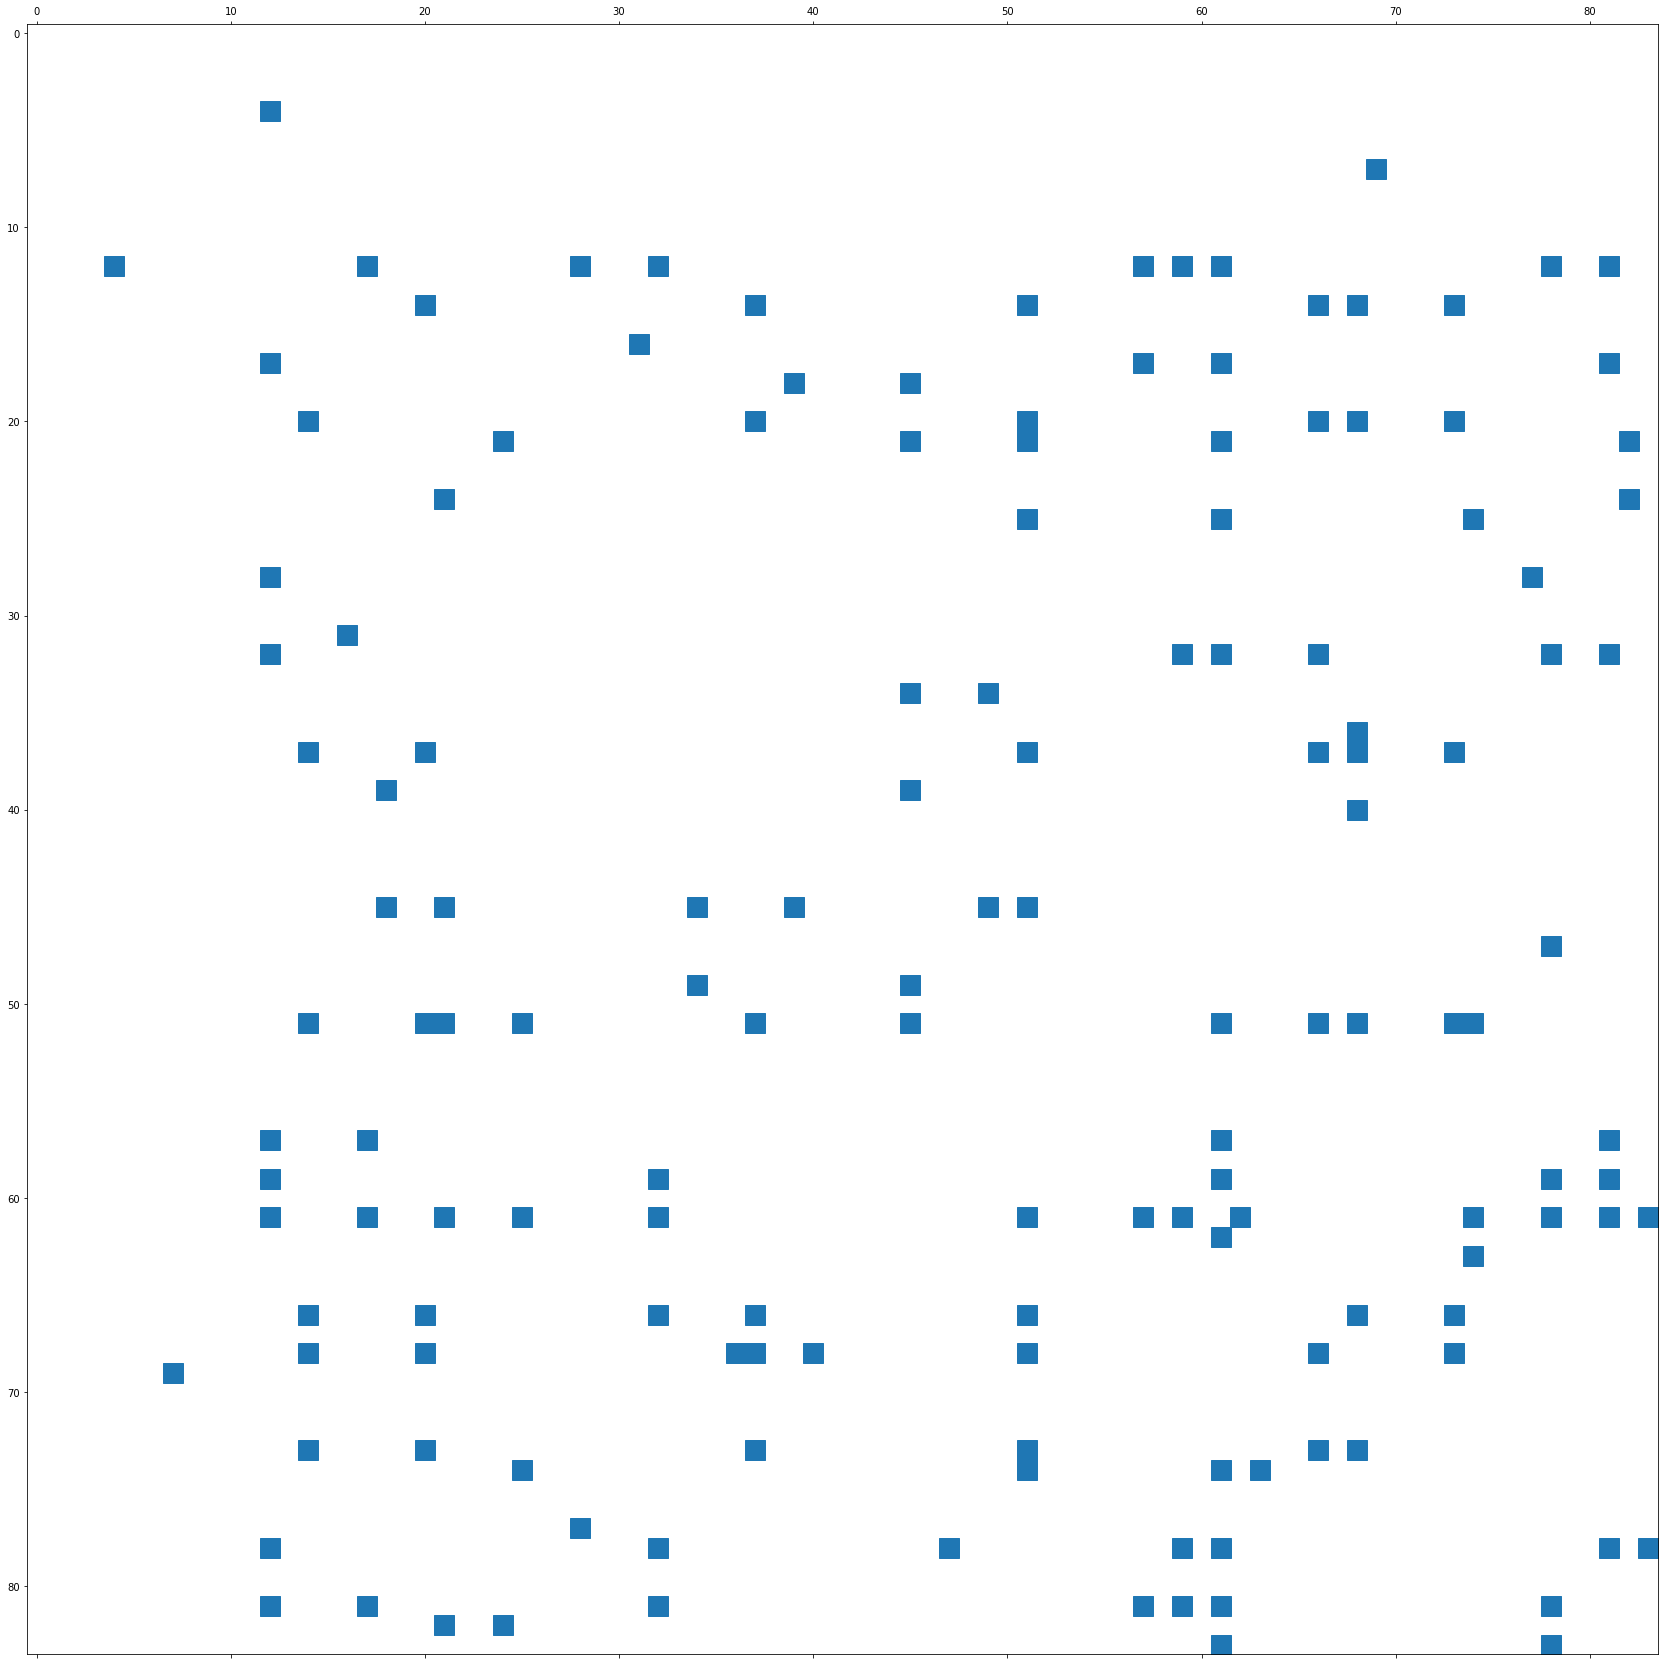

In [15]:
matrix_sim_entities, rows, cols = load_matrix('sim_entities','/home/meili/Downloads/matrices/')
plot = plt.figure(figsize=(30, 30))
plt.spy(matrix_sim_entities, markersize=20)

In [16]:
export_fig(plot, 'si_entities')

In [27]:
cols

['2666349',
 '2666169',
 '2645245',
 '2491279',
 '2490464',
 '2491282',
 '2464704',
 '2491280',
 '2665658',
 '2517995',
 '2490619',
 '2468168',
 '2491250',
 '2666744',
 '2645248',
 '2645249',
 '2666641',
 '2518512',
 '2657499',
 '2465212',
 '2465804',
 '1818388',
 '2468740',
 '2684943',
 '2646416',
 '2666159',
 '2465806',
 '2645389',
 '2666160',
 '2295710',
 '2666889',
 '2657660',
 '2665421',
 '2463202',
 '2517518',
 '2642207',
 '2110066',
 '2465799',
 '2684904',
 '2666497',
 '2666170',
 '2539707',
 '1840557',
 '2517158',
 '2665409',
 '2517519',
 '2463836',
 '2424796',
 '2465783',
 '2394837',
 '2467235',
 '2458513',
 '2517160',
 '2345161',
 '2345171',
 '2552396',
 '2666164',
 '2463841',
 '2345200',
 '2518180',
 '2467930',
 '2398454',
 '2586887',
 '2464700',
 '2345157',
 '2528107',
 '2665460',
 '2466247',
 '2474658',
 '2491284',
 '2665441',
 '2491283',
 '2469528',
 '2469526',
 '2460254',
 '2666161',
 '2665414',
 '2672556',
 '2376252',
 '2519004',
 '2665377',
 '2396436',
 '2666162',
 '25